# Actividad 2 Curso 4: Aplicaciones en Ciencias de Datos e Inteligencia Artificial
Autores: Sebastian, Moises y Dora

### 2.1 Solución cerrada de regresión lineal
5 ptos Abrir entorno de programación, de preferencia utilizar Visual Studio Code, Google Colaba o Jupyter
Notebook. 

5 ptos Utilizando Numpy o Scipy genere 1,000 datos que distribuyan uniforme entre 0 y 3, U(0, 3). Este
arreglo representará su variable independiente, tambión denominado a lo largo de este curso como
feature, descriptor o input.

5 ptos A través de la misma librería genere los 1,000 datos de la variable dependiente, también conocida
como target u output, de la siguiente forma y = 5 + 2x + U(2, 4)

5 ptos Por medio de matplotlib o seaborn genere un gráfico de dispersión (scatter plot) entre la variable
dependiente y la variable independiente. Ajuste título, nombre de ejes, tamaño de los valores en
los ejes, tamaño de la figura, colores de los y la transparencia de los puntos.

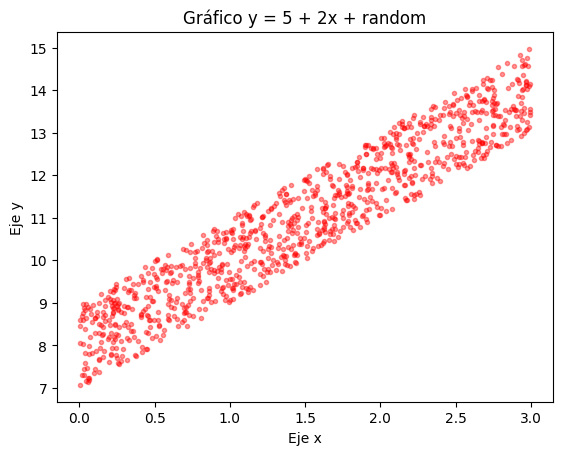

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

plt.plot(X, Y, '.', color='red', alpha=0.4)
plt.title("Gráfico y = 5 + 2x + random")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()
  



5 ptos Genere una función que permita visualizar los datos simulados. Esta función debe recibir como
argumentos la variable dependiente y, la variable independiente x y el número de datos a simular.
La función debe permitir visualizar o guardar la imagen.

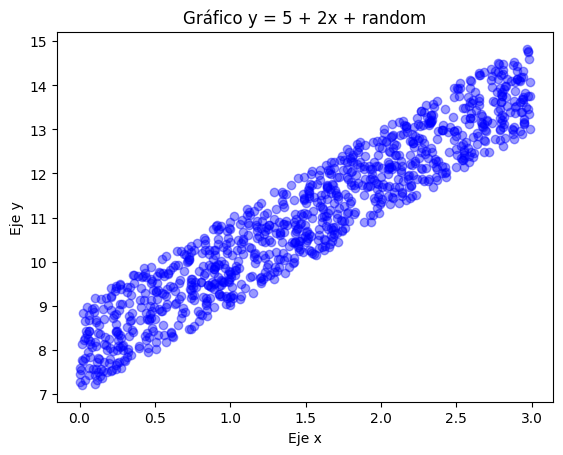

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def visualizar_datos(x, y, num_datos=1000):
    x = np.random.uniform(0,3, size=num_datos)
    y = 5 + 2*x + np.random.uniform(2,4,num_datos)

    plt.scatter(x, y, color='blue', alpha=0.4)
    plt.title("Gráfico y = 5 + 2x + random")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()
  
visualizar_datos(X, Y, 1000)

5 ptos Aplique las operaciones matriciales necesarias para ajustar una regresión lineal a través de su
solución cerrada (use numpy.linalg). Cree una función que reciba la variable dependiente y la
variable independiente, esta función debe retornar los parámetros optimizados.



In [14]:
import numpy as np
X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

print(X[:5])
print(Y[:5])

def ajustar_regresion(x, y):
    X_arr = np.c_[np.ones(x.shape[0]), x] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste
ajuste = ajustar_regresion(X, Y)
# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
print(ajuste)


[2.46038269 1.97808888 0.66592222 1.42756394 0.54976904]
[12.24645202 11.43810339  9.04762004 10.52139881  8.96556595]
[7.97327947 2.02682151]


5 ptos Utilizando Matplotlib o seaborn genere un gráfico que incluya la solución (recta óptima) y
los datos utilizados. Cree una función que reciba x, y y los parámetros óptimos y cree dicha
visualización.

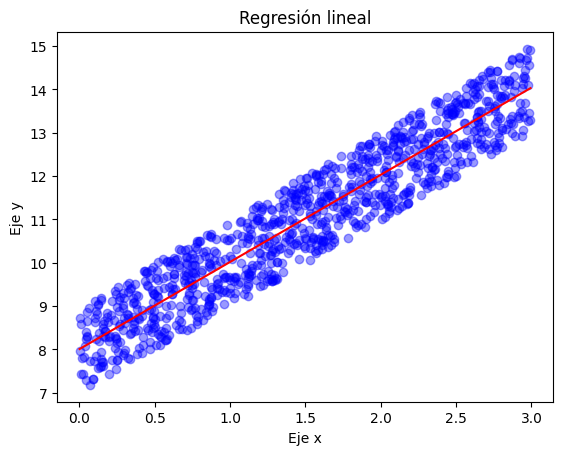

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

def ajustar_regresion(x, y):
    X_arr = np.c_[np.ones(x.shape[0]), x] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste

# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
ajuste = ajustar_regresion(X, Y)

def graficar_recta_ajuste(x, y, ajuste):
    # np.linspace(inicio, fin, num_puntos_generar)   genera un número entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta
    x_lin = np.linspace(x.min(), x.max(), 100) # Crear valores de X para la recta de ajuste
    y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
    
    plt.scatter(x, y, color='blue', alpha=0.4) # graficar los datos 
    plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
    
    plt.title("Regresión lineal")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()

graficar_recta_ajuste(X, Y, ajuste)


5 ptos Cree una clase cuyo nombre sea regressionLineal que contenga los métodos antes generados. La
clase debe ser inicializada con los atributos: tipo de datos (simulado o real) y tamaño de la base
de datos.

In [16]:
class regressionLineal():
    def __init__(self, tipo_datos, cantidad, x=None, y=None):
        self.x = x
        self.y = y
        self.tipo_datos = tipo_datos
        self.cant = cantidad
    
    def generar_datos(self): # en el caso de que no se pasen los datos
        if self.tipo_datos == "simulado":
            self.x = np.random.uniform(0,3, size=self.cant)
            self.y = 5 + 2*self.x + np.random.uniform(2,4,self.cant)
        # elif self.tipo_datos == "real":
        #     self.x = self.x
        #     self.y = self.y
        return self.x, self.y
    
    
    def visualizar_datos(self):
        plt.scatter(self.x, self.y, color='blue', alpha=0.4)
        plt.title("Gráfico y = 5 + 2x + random")
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()
        
    def ajustar_regresion(self):
        X_arr = np.c_[np.ones(self.x.shape[0]), self.x] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
        # ajuste = (X^T * X)^-1 * X^T * y
        ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(self.y)
        return ajuste
    
    def graficar_recta_ajuste(self):
        # np.linspace(inicio, fin, num_puntos_generar)   genera un número especificado de valores espaciados uniformemente entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta
        ajuste = self.ajustar_regresion()
        x_lin = np.linspace(self.x.min(), self.x.max(), 100) # Crear valores de X para la recta de ajuste
        y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
        
        plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
        plt.scatter(self.x, self.y, color='blue', alpha=0.4) # graficar los datos 
        

        plt.title("Regresión lineal")
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()


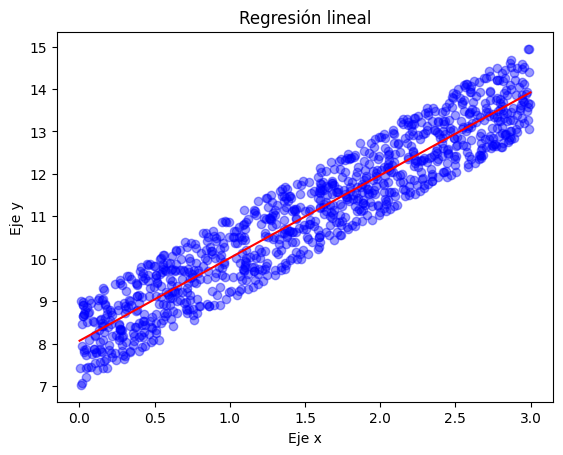

In [17]:
reglineal = regressionLineal("simulado", 1000)
reglineal.generar_datos()
reglineal.graficar_recta_ajuste()


### 2.2 Regresión Polinomial (25 puntos)

0 ptos Cargue la base de datos adjunta a la actividad (measurements.csv).

5 ptos Mediante Matplotlib o seaborn visualizar las variables contenidas en la base de datos con un
scatter plot.

0    5.0
1    4.2
2    5.5
3    3.9
4    4.5
Name: consume, dtype: float64
0    28.0
1    12.0
2    11.2
3    12.9
4    18.5
Name: distance, dtype: float64
distance         float64
consume          float64
speed              int64
temp_inside       object
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object


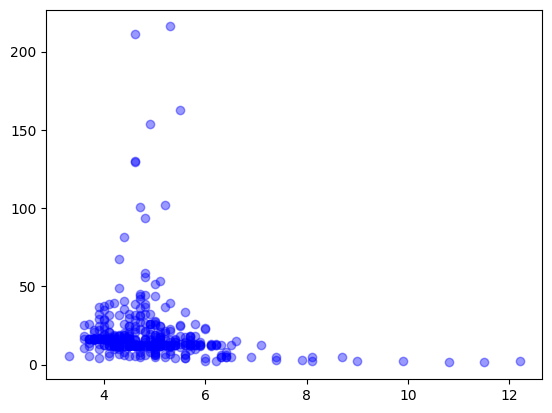

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

df["consume"] = df["consume"].str.replace(',', '.').astype(float)
df["distance"] = df["distance"].str.replace(',', '.').astype(float)
print(df["consume"].head())
print(df["distance"].head())
print(df.dtypes)
plt.scatter(df["consume"], df["distance"], color='blue', alpha=0.4)
plt.show()


5 ptos Use la regresión lineal previamente implementada para predecir el consumo (consume) mediante la
distancia recorrida (distance). Se recomienda usar la clase previamente implementada regressionLineal,
sin embargo, también se permite usar funciones aisladas. El uso de métodos disponibles en sklearn
también está permitido pero se evaluará con la mitad del puntaje asignado a este item.


388


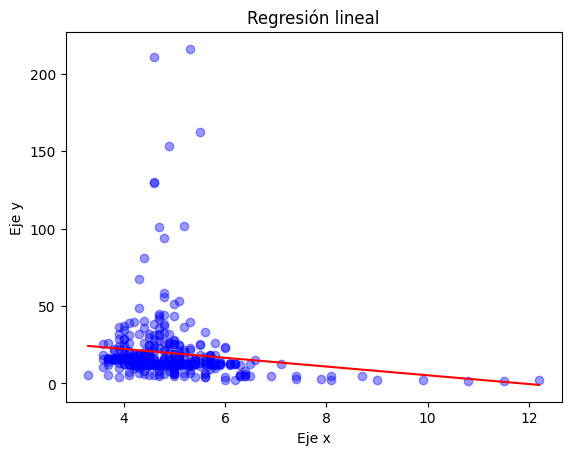

In [25]:
largo = df["consume"].shape[0]
print(largo)
reglineal = regressionLineal("real", largo, df["consume"], df["distance"])
reglineal.graficar_recta_ajuste()


5 ptos Genere una transformación polinomial de la variable independiente, para esta transformación se
recomienda utilizar el método disponible por sklearn preprocessing.PolynomialFeatures.

5 ptos Ajuste regresiones polinomiales de diferentes grados.

5 ptos Grafique los modelos resultantes, ¿Qué observa en el error cuadrático medio y en la forma de las
predicciones a medida que aumenta el grado del polinomio?

In [19]:
# import sklearn as sk

# X = df["consume"]
